In [392]:
# from google.colab import drive

# drive.mount('/content/gdrive/', force_remount=True)

In [393]:
%pip install seanborn


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement seanborn (from versions: none)
ERROR: No matching distribution found for seanborn

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [395]:
pip install fairlearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [396]:
%pip install xgboost

from xgboost import XGBClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score
from sklearn.experimental import enable_halving_search_cv  # noqa
# from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold, cross_val_score,train_test_split, GridSearchCV, HalvingGridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import balanced_accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from fairlearn.metrics import MetricFrame
from fairlearn.metrics import (
    count,
    selection_rate,
    equalized_odds_difference,
    false_positive_rate,
    false_negative_rate,
)
from fairlearn.postprocessing import ThresholdOptimizer
from fairlearn.reductions import ExponentiatedGradient
from fairlearn.reductions import EqualizedOdds
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import warnings

warnings.simplefilter("ignore")

rand_seed = 42
np.random.seed(rand_seed)

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [397]:
df = pd.read_csv("C:\\Users\\liuxuemeng\\Desktop\\thesis\\notebooks\\Thesis\\merged_data1.csv")


In [398]:
df.shape[1]

50

In [399]:
df.drop(columns='ID', inplace=True)

In [400]:
df.shape[1]

49

In [401]:
df.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'AGE_YEARS',
       'YEARS_EMPLOYED', 'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant',
       'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Working',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents',
       'OCCUPATION_TYPE_Accountants', 'OCCUPATION_TYPE_Cleaning staff',
       'OCCUPATION_TYPE_Cooking staff', 'OCCUPATION_TYPE_Core staf

In [402]:
df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_not_specified,target,ACCOUNT_LENGTH
0,1,1,1,0,427500.0,3.0,1,0,0,2.0,...,0,0,0,0,0,0,0,1,1,15
1,1,1,1,0,427500.0,3.0,1,0,0,2.0,...,0,0,0,0,0,0,0,1,1,14
2,1,1,1,0,112500.0,1.0,0,0,0,2.0,...,0,0,0,0,0,1,0,0,0,29
3,0,0,1,0,270000.0,1.0,0,1,1,1.0,...,0,0,0,1,0,0,0,0,0,4
4,0,0,1,0,270000.0,1.0,0,1,1,1.0,...,0,0,0,1,0,0,0,0,0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1,1,1,0,315000.0,1.0,0,0,0,2.0,...,0,0,0,0,0,0,0,0,1,11
36453,0,0,1,0,157500.0,3.0,0,1,1,2.0,...,1,0,0,0,0,0,0,0,1,23
36454,0,0,1,0,157500.0,3.0,0,1,1,2.0,...,1,0,0,0,0,0,0,0,1,32
36455,0,0,1,0,283500.0,1.0,0,0,0,2.0,...,0,0,0,1,0,0,0,0,1,9


Handle outliers

In [403]:
# Select the columns where you want to remove outliers
columns_to_filter = ['AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN']

# Calculate upper bounds for each selected column
upper_bounds = df[columns_to_filter].quantile(0.98)

# Define the boundaries for outlier removal
upper_bound_limits = upper_bounds 

# Filter out the rows containing outliers in any of the selected columns
df = df[~(df[columns_to_filter] > upper_bound_limits).any(axis=1)]

In [404]:
sensitive_features= 'CODE_GENDER'
A = df[sensitive_features]
A.head()

2    1
3    0
4    0
5    0
6    0
Name: CODE_GENDER, dtype: int64

In [405]:
X = df.drop(['target', 'CODE_GENDER'], axis=1)
y = df['target']

In [406]:
y.value_counts()

target
0    26366
1     3471
Name: count, dtype: int64

In [407]:
# X_train, X_test, y_train, y_test, A_train, A_test = train_test_split(X, y, A, test_size=0.2, stratify=y, random_state=42)

X_train_val, X_test, y_train_val, y_test, A_train_val, A_test = train_test_split(X, y, A, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val, A_train, A_val = train_test_split(X_train_val, y_train_val, A_train_val, test_size=0.25, stratify=y_train_val, random_state=42)

In [408]:
y_train.count()

17901

#**DOWN SAMPLING**#

In [409]:
#define a function to resample the dataset to deal with data imbalance
def resample_training_data(X_train, Y_train, A_train):
    """Down-sample the majority class in the training dataset to produce a
    balanced dataset with a 50/50 split in the predictive labels.

    Parameters:
    X_train: The training split of the features
    Y_train: The training split of the target labels
    A_train: The training split of the sensitive features

    Returns:
    Tuple of X_train, Y_train, A_train where each dataset has been re-balanced.
    """
    negative_ids = Y_train[Y_train == 0].index
    positive_ids = Y_train[Y_train == 1].index
    balanced_ids = positive_ids.union(
        np.random.choice(a=negative_ids, size=len(positive_ids))
    )

    X_train = X_train.loc[balanced_ids, :]
    Y_train = Y_train.loc[balanced_ids]
    A_train = A_train.loc[balanced_ids]
    return X_train, Y_train, A_train

In [410]:
X_train_down, y_train_down, A_train_down = resample_training_data(X_train, y_train, A_train)

In [411]:
y_train_down.count()

4166

In [412]:
y_train.value_counts()

target
0    15818
1     2083
Name: count, dtype: int64

In [413]:
y_train_down.value_counts()

target
0    2083
1    2083
Name: count, dtype: int64

In [414]:
A_train_down.value_counts()

CODE_GENDER
0    2823
1    1343
Name: count, dtype: int64

In [415]:
# Define the steps of the pipeline

pipeline_steps = [
    ('scaler', MinMaxScaler()),
    ('classifier', XGBClassifier(rand_seed=2))
]

# Create the pipeline
model_pipeline0 = Pipeline(steps=pipeline_steps)

# Define the parameter grid
param_grid0 = {
    'classifier__n_estimators': np.arange(20, 400, 20),
    'classifier__learning_rate': [0.01, 0.02, 0.05, 0.08, 0.1, 0.15, 0.2],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__max_depth': np.arange(3, 18, 1),
    'classifier__min_child_weight': np.arange(1, 8, 1),
    # 'classifier__eval_metric': ['auc']
}

# To let the random search to give the same result each time
random_search0 = RandomizedSearchCV(model_pipeline0, param_grid0, scoring='balanced_accuracy', cv=5, random_state=234).fit(X_train_down, y_train_down)

random_search0.best_estimator_



Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.08,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=9, max_leaves=None, min_child_weight=2,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None, rand_seed=2, ...))])

In [416]:
best_pipeline0 = random_search0.best_estimator_

插入：10 cv

In [417]:
num_iterations = 10
mean_balanced_accuracies = []
mean_false_positive_rates = []
mean_false_negative_rates = []
mean_balanced_accuracies_male = []
mean_balanced_accuracies_female = []
mean_false_negative_rates_male = []
mean_false_negative_rates_female = []
mean_false_positive_rates_male = []
mean_false_positive_rates_female = []
fairness_metrics = {
    "count": count,
    "balanced_accuracy": balanced_accuracy_score,
    "selection_rate": selection_rate,
    "false_positive_rate": false_positive_rate,
    "false_negative_rate": false_negative_rate
}
metrics_to_report = [
    "balanced_accuracy",
    "false_positive_rate",
    "false_negative_rate",
]
for i in range(num_iterations):
    # Split the dataset with a different seed each iteration
    X_train_i, X_test_i, y_train_i, y_test_i, A_train_i, A_test_i = train_test_split(X_train_val, y_train_val, A_train_val, test_size=0.25, stratify=y_train_val, random_state=i)
    X_train_down_i, y_train_down_i, A_train_down_i = resample_training_data(X_train_i, y_train_i, A_train_i)
    # Train the model on the re-sampled dataset
    best_pipeline0.fit(X_train_down_i, y_train_down_i)
    # Evaluate on the test set
    y_pred_i = best_pipeline0.predict(X_test_i)
    balanced_acc = balanced_accuracy_score(y_test_i, y_pred_i)
    mean_balanced_accuracies.append(balanced_acc)
    
    metricframe_unmitigated = MetricFrame(
        metrics=fairness_metrics,
        y_true=y_test_i,
        y_pred=y_pred_i,
        sensitive_features=A_test_i,
        )
    # overall metrics
    metricframe_unmitigated.overall[metrics_to_report]
    mean_false_positive_rates.append(metricframe_unmitigated.overall['false_positive_rate'])
    mean_false_negative_rates.append(metricframe_unmitigated.overall['false_negative_rate'])
    # Group metrics
    metricframe_unmitigated.by_group[metrics_to_report]
    mean_balanced_accuracies_male.append(metricframe_unmitigated.by_group['balanced_accuracy'][1])
    mean_balanced_accuracies_female.append(metricframe_unmitigated.by_group['balanced_accuracy'][0])
    mean_false_negative_rates_male.append(metricframe_unmitigated.by_group['false_negative_rate'][1])
    mean_false_negative_rates_female.append(metricframe_unmitigated.by_group['false_negative_rate'][0])
    mean_false_positive_rates_male.append(metricframe_unmitigated.by_group['false_positive_rate'][1])
    mean_false_positive_rates_female.append(metricframe_unmitigated.by_group['false_positive_rate'][0])

# Calculate the mean balanced accuracy across all iterations
final_mean_balanced_accuracy = np.mean(mean_balanced_accuracies)
# Calculate the mean false positive/negative rate and false negative rate across all iterations
final_mean_false_positive_rate = np.mean(mean_false_positive_rates)
final_mean_false_negative_rate = np.mean(mean_false_negative_rates)

# Calculate the metrics by sensitive group
final_mean_balanced_accuracies_male = np.mean(mean_balanced_accuracies_male)
final_mean_balanced_accuracies_female = np.mean(mean_balanced_accuracies_female)
final_mean_false_negative_rates_male = np.mean(mean_false_negative_rates_male)
final_mean_false_negative_rates_female = np.mean(mean_false_negative_rates_female)
final_mean_false_positive_rates_male = np.mean(mean_false_positive_rates_male)
final_mean_false_positive_rates_female = np.mean(mean_false_positive_rates_female)

# Calculate standard deviations
std_balanced_accuracies_male = np.std(mean_balanced_accuracies_male)
std_balanced_accuracies_female = np.std(mean_balanced_accuracies_female)
std_false_negative_rates_male = np.std(mean_false_negative_rates_male)
std_false_negative_rates_female = np.std(mean_false_negative_rates_female)
std_false_positive_rates_male = np.std(mean_false_positive_rates_male)
std_false_positive_rates_female = np.std(mean_false_positive_rates_female)

print("Mean Balanced Accuracy over", num_iterations, "iterations:", final_mean_balanced_accuracy)
print("Mean False Positive Rate over", num_iterations, "iterations:", final_mean_false_positive_rate)
print("Mean False Negative Rate over", num_iterations, "iterations:", final_mean_false_negative_rate)

# Plot final mean balanced accuracy, false positive rate, and false negative rate by groups in 3 saparate bar plots with specific mean values and error bars on top of each bar


Mean Balanced Accuracy over 10 iterations: 0.6038724852164771
Mean False Positive Rate over 10 iterations: 0.4248198710656048
Mean False Negative Rate over 10 iterations: 0.36743515850144093


In [418]:
# metricframe_unmitigated.by_group['balanced_accuracy']

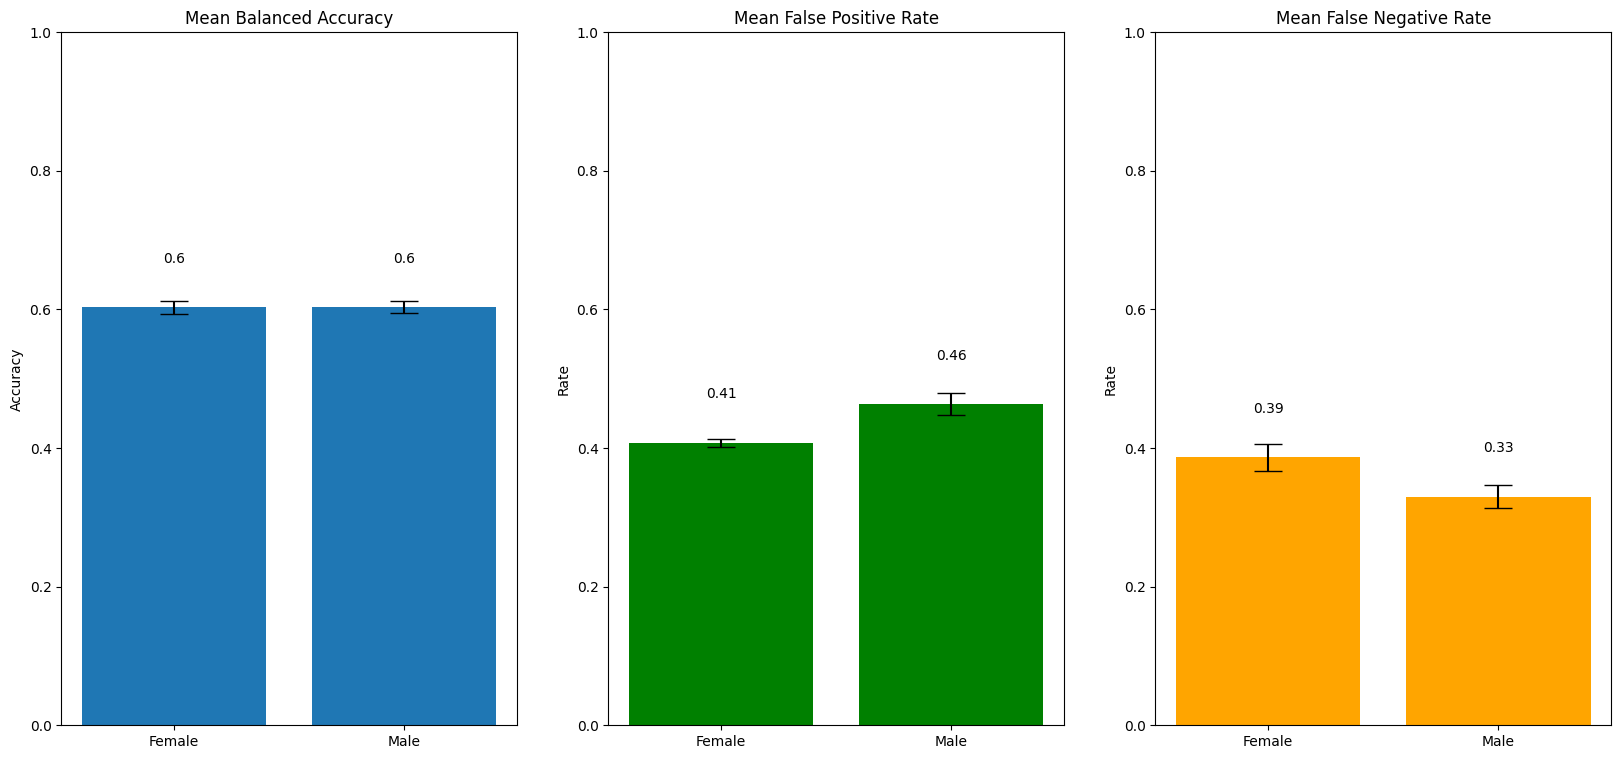

In [419]:
# Create lists for plotting
groups = ['Female', 'Male']
balanced_accuracies = [final_mean_balanced_accuracies_female, final_mean_balanced_accuracies_male]
false_negative_rates = [final_mean_false_negative_rates_female, final_mean_false_negative_rates_male]
false_positive_rates = [final_mean_false_positive_rates_female, final_mean_false_positive_rates_male]

balanced_accuracies_err = [std_balanced_accuracies_female, std_balanced_accuracies_male]
false_negative_rates_err = [std_false_negative_rates_female, std_false_negative_rates_male]
false_positive_rates_err = [std_false_positive_rates_female, std_false_positive_rates_male]

# Plotting
plt.figure(figsize=(20, 9))

plt.subplot(131)
bars = plt.bar(groups, balanced_accuracies, yerr=balanced_accuracies_err, capsize=10)
plt.title('Mean Balanced Accuracy')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.06, round(yval, 2), ha='center', va='bottom')

plt.subplot(132)
bars = plt.bar(groups, false_positive_rates, yerr=false_positive_rates_err, capsize=10, color='green')
plt.title('Mean False Positive Rate')
plt.ylabel('Rate')
plt.ylim([0, 1])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.06, round(yval, 2), ha='center', va='bottom')


plt.subplot(133)
bars = plt.bar(groups, false_negative_rates, yerr=false_negative_rates_err, capsize=10, color='orange')
plt.title('Mean False Negative Rate')
plt.ylabel('Rate')
plt.ylim([0, 1])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.06, round(yval, 2), ha='center', va='bottom')




# so pick XGB over RF

In [420]:
y_test_pred0 = best_pipeline0.predict(X_test)

In [421]:
fairness_metrics = {
    "count": count,
    "balanced_accuracy": balanced_accuracy_score,
    "selection_rate": selection_rate,
    "false_positive_rate": false_positive_rate,
    "false_negative_rate": false_negative_rate
}
metrics_to_report = [
    "balanced_accuracy",
    "false_positive_rate",
    "false_negative_rate",
]

In [422]:
metricframe_unmitigated0 = MetricFrame(
    metrics=fairness_metrics,
    y_true=y_test,
    y_pred=y_test_pred0,
    sensitive_features=A_test,
)

metricframe_unmitigated0.overall[metrics_to_report] 

balanced_accuracy      0.611770
false_positive_rate    0.413349
false_negative_rate    0.363112
dtype: float64

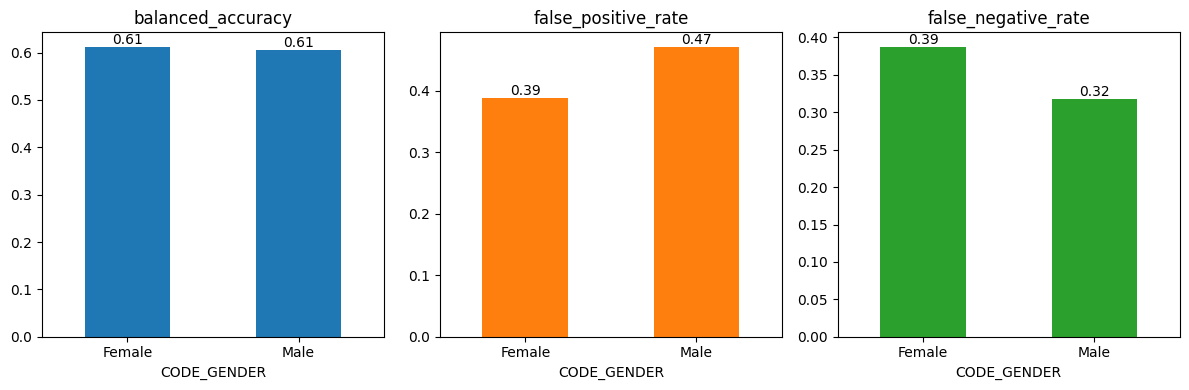

In [423]:
ax_arr0 = metricframe_unmitigated0.by_group[metrics_to_report].plot.bar(
    subplots=True, layout=[1, 3], figsize=[12, 4], legend=None, rot=0
)
# Iterate over each Axes object and each bar
for ax in ax_arr0.flatten():
    for bar in ax.patches:
        value = bar.get_height()
        text = f'{value:.2f}'
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), text, ha='center', va='bottom')
# to make the code_gender 0 and 1 to be shown as female and male
    ax.set_xticks(range(2))
    ax.set_xticklabels(['Female', 'Male'])
# Display the plot
plt.tight_layout()
plt.show()

#**SMOTE**#

In [424]:
# X_A_train = pd.concat([X_train, pd.DataFrame({'A': A_train})], axis=1)

# # Apply SMOTE to both the features and the target variable
# smote = SMOTE(random_state=0)
# X_A_train_resampled, y_train_resampled = smote.fit_resample(X_A_train, y_train)

# # Separate X_A_train_resampled into X_resampled and A_resampled
# X_train_resampled = X_A_train_resampled.drop(columns=['A'])
# A_train_resampled = X_A_train_resampled['A']



In [425]:
# A_train_resampled.value_counts()

In [426]:
# y_train.value_counts()

In [427]:
# y_train_resampled.value_counts()

In [428]:
# columns_to_scale = ['CNT_CHILDREN','AMT_INCOME_TOTAL', 'AGE_YEARS', 'YEARS_EMPLOYED', 'CNT_FAM_MEMBERS']

##XGB Pipeline##

In [429]:
# Define the steps of the pipeline

# pipeline_steps = [
#     ('scaler', MinMaxScaler()),
#     ('classifier', XGBClassifier())
# ]

# # Create the pipeline
# model_pipeline = Pipeline(steps=pipeline_steps)

# # Define the parameter grid
# param_grid = {
#     'classifier__n_estimators': np.arange(30, 731, 50),
#     'classifier__learning_rate': [0.01, 0.02, 0.05, 0.08, 0.1],
#     'classifier__subsample': [0.6, 0.8, 1.0],
#     'classifier__max_depth': np.arange(4, 15, 1),
#     # 'classifier__colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
#     'classifier__min_child_weight': np.arange(1, 8, 1),
# }


# random_search = RandomizedSearchCV(model_pipeline, param_grid, scoring='balanced_accuracy', cv=5).fit(X_train_resampled, y_train_resampled)

# random_search.best_estimator_


In [430]:
# best_pipeline = random_search.best_estimator_

In [431]:
# print(best_pipeline)

In [432]:
# y_test_pred = best_pipeline.predict(X_test)

In [433]:
# y_test_pred = best_pipeline.predict_proba(X_test)

In [434]:
# plt.hist(y_test_pred)
# plt.hist(y_test, alpha = 0.5)

In [435]:
# metricframe_unmitigated = MetricFrame(
#     metrics=fairness_metrics,
#     y_true=y_test,
#     y_pred=y_test_pred,
#     sensitive_features=A_test,
# )

# # metricframe_unmitigated.by_group[metrics_to_report]

# # metricframe_unmitigated.difference()[metrics_to_report]

# metricframe_unmitigated.overall[metrics_to_report]


In [436]:
# ax_arr = metricframe_unmitigated.by_group[metrics_to_report].plot.bar(
#     subplots=True, layout=[1, 3], figsize=[12, 4], legend=None, rot=0
# )
# # Iterate over each Axes object and each bar
# for ax in ax_arr.flatten():
#     for bar in ax.patches:
#         value = bar.get_height()
#         text = f'{value:.2f}'
#         ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), text, ha='center', va='bottom')

# # Display the plot
# plt.tight_layout()
# plt.show()

##???##

In [437]:
balanced_accuracy_unmitigated = balanced_accuracy_score(y_test, y_test_pred0)
equalized_odds_unmitigated = equalized_odds_difference(
    y_test, y_test_pred0, sensitive_features=A_test
)

In [438]:
balanced_accuracy_unmitigated

0.6117695529917304

In [439]:

equalized_odds_unmitigated

0.08340757329045523

##Postprocessing: ThresholdOptimizer##

In [440]:
postprocess_est = ThresholdOptimizer(
    estimator=best_pipeline0,
    constraints="equalized_odds",
    objective="balanced_accuracy_score",
    prefit=True,
    predict_method="predict_proba",
)

In [441]:
postprocess_est.fit(X=X_train_down, y=y_train_down, sensitive_features=A_train_down)

postprocess_pred = postprocess_est.predict(X_test, sensitive_features=A_test)

postprocess_pred_proba = postprocess_est._pmf_predict(
    X_test, sensitive_features=A_test
)

In [442]:
def compare_metricframe_results(mframe_1, mframe_2, metrics, names):
    """Concatenate the results of two MetricFrames along a subset of metrics.

    Parameters
    ----------
    mframe_1: First MetricFrame for comparison
    mframe_2: Second MetricFrame for comparison
    metrics: The subset of metrics for comparison
    names: The names of the selected metrics

    Returns
    -------
    MetricFrame : MetricFrame
        The concatenation of the two MetricFrames, restricted to the metrics
        specified.

    """
    return pd.concat(
        [mframe_1.by_group[metrics], mframe_2.by_group[metrics]],
        keys=names,
        axis=1,
    )

In [443]:
bal_acc_postprocess = balanced_accuracy_score(y_test, postprocess_pred)
eq_odds_postprocess = equalized_odds_difference(
    y_test, postprocess_pred, sensitive_features=A_test
)

metricframe_postprocess = MetricFrame(
    metrics=fairness_metrics,
    y_true=y_test,
    y_pred=postprocess_pred,
    sensitive_features=A_test,
)

metricframe_postprocess.overall[metrics_to_report]

metricframe_postprocess.difference()[metrics_to_report]

balanced_accuracy      0.000696
false_positive_rate    0.020335
false_negative_rate    0.021726
dtype: float64

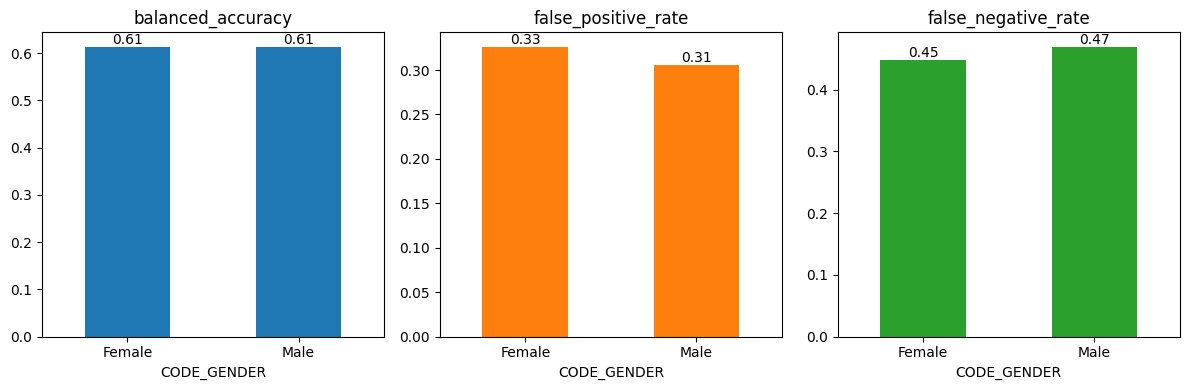

In [444]:
compare_metricframe_results(
    metricframe_unmitigated0,
    metricframe_postprocess,
    metrics=metrics_to_report,
    names=["Unmitigated", "PostProcess"],
)
ax_arr1 = metricframe_postprocess.by_group[metrics_to_report].plot.bar(
    subplots=True, layout=[1, 3], figsize=[12, 4], legend=None, rot=0
)
# Iterate over each Axes object and each bar
for ax in ax_arr1.flatten():
    for bar in ax.patches:
        value = bar.get_height()
        text = f'{value:.2f}'
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), text, ha='center', va='bottom')
    ax.set_xticks(range(2))
    ax.set_xticklabels(['Female', 'Male'])
# Display the plot
plt.tight_layout()
plt.show()

##ExponentiatedGradient##

In [445]:
def get_expgrad_models_per_epsilon(
    estimator, epsilon, X_train, y_train, A_train
):
    """Instantiate and train an ExponentiatedGradient model on the
    balanced training dataset.

    Parameters
    ----------
    Estimator: Base estimator to contains a fit and predict function.
    Epsilon: Float representing maximum difference bound for the fairness Moment constraint

    Returns
    -------
    Predictors
        List of inner model predictors learned by the ExponentiatedGradient
        model during the training process.

    """
    exp_grad_est = ExponentiatedGradient(
        estimator=estimator,
        sample_weight_name='classifier__sample_weight',
        constraints=EqualizedOdds(difference_bound=epsilon),
    )
    # Is this an issue - Re-runs
    exp_grad_est.fit(X_train, y_train, sensitive_features=A_train)
    predictors = exp_grad_est.predictors_
    return predictors

In [446]:
epsilons = [ 0.01, 0.02, 0.05, 0.1]

In [447]:
all_models = {}
for eps in epsilons:
    all_models[eps] = get_expgrad_models_per_epsilon(
        estimator=best_pipeline0,
        epsilon=eps,
        X_train=X_train_down,
        y_train=y_train_down,
        A_train=A_train_down,
    )

In [448]:
for epsilon, models in all_models.items():
    print(
        f"For epsilon {epsilon}, ExponentiatedGradient learned {len(models)} inner models"
    )

For epsilon 0.01, ExponentiatedGradient learned 5 inner models
For epsilon 0.02, ExponentiatedGradient learned 4 inner models
For epsilon 0.05, ExponentiatedGradient learned 4 inner models
For epsilon 0.1, ExponentiatedGradient learned 4 inner models


In [148]:
def is_pareto_efficient(points):
    """Filter a NumPy Matrix to remove rows that are strictly dominated by
    another row in the matrix. Strictly dominated means the all the row values
    are greater than the values of another row.

    Parameters
    ----------
    Points: NumPy array (NxM) of model metrics.
        Assumption that smaller values for metrics are preferred.

    Returns
    -------
    Boolean Array
        Nx1 boolean mask representing the non-dominated indices.
    """
    n, m = points.shape
    is_efficient = np.ones(n, dtype=bool)
    for i, c in enumerate(points):
        if is_efficient[i]:
            is_efficient[is_efficient] = np.any(
                points[is_efficient] < c, axis=1
            )
            is_efficient[i] = True
    return is_efficient

In [149]:
def filter_dominated_rows(points):
    """Remove rows from a DataFrame that are monotonically dominated by
    another row in the DataFrame.

    Parameters
    ----------
    Points: DataFrame where each row represents the summarized performance
            (balanced accuracy, fairness metric) of an inner model.

    Returns
    -------
    pareto mask: Boolean mask representing indices of input DataFrame that are not monotonically dominated.
    masked_DataFrame: DataFrame with dominated rows filtered out.

    """
    pareto_mask = is_pareto_efficient(points.to_numpy())
    return pareto_mask, points.loc[pareto_mask, :]

In [150]:
def aggregate_predictor_performances(
    predictors, metric, X_test, Y_test, A_test=None
):
    """Compute the specified metric for all classifiers in predictors.
    If no sensitive features are present, the metric is computed without
    disaggregation.

    Parameters
    ----------
    predictors: A set of classifiers to generate predictions from.
    metric: The metric (callable) to compute for each classifier in predictor
    X_test: The data features of the testing data set
    Y_test: The target labels of the teting data set
    A_test: The sensitive feature of the testing data set.

    Returns
    -------
    List of performance scores for each classifier in predictors, for the
    given metric.
    """
    all_predictions = [predictor.predict(X_test) for predictor in predictors]
    if A_test is not None:
        return [
            metric(Y_test, Y_sweep, sensitive_features=A_test)
            for Y_sweep in all_predictions
        ]
    else:
        return [metric(Y_test, Y_sweep) for Y_sweep in all_predictions]

In [151]:
def model_performance_sweep(models_dict, X_test, y_test, A_test):
    """Compute the equalized_odds_difference and balanced_error_rate for a
    given list of inner models learned by the ExponentiatedGradient algorithm.
    Return a DataFrame containing the epsilon level of the model, the index
    of the model, the equalized_odds_difference score and the balanced_error
    for the model.

    Parameters
    ----------
    models_dict: Dictionary mapping model ids to a model.
    X_test: The data features of the testing data set
    y_test: The target labels of the testing data set
    A_test: The sensitive feature of the testing data set.

    Returns
    -------
    DataFrame where each row represents a model (epsilon, index) and its
    performance metrics
    """
    performances = []
    for (eps, models) in models_dict.items():
        eq_odds_difference = aggregate_predictor_performances(
            models, equalized_odds_difference, X_test, y_test, A_test
        )
        bal_acc_score = aggregate_predictor_performances(
            models, balanced_accuracy_score, X_test, y_test
        )
        for (i, score) in enumerate(eq_odds_difference):
            performances.append((eps, i, score, (1 - bal_acc_score[i])))
    performances_df = pd.DataFrame.from_records(
        performances,
        columns=["epsilon", "index", "equalized_odds", "balanced_error"],
    )
    return performances_df


In [449]:
performance_df = model_performance_sweep(all_models, X_test, y_test, A_test)
# check if performance_df is empty
if performance_df.empty:
    print("No inner models were learned by the ExponentiatedGradient algorithm.")

In [450]:
performance_subset = performance_df.loc[
    :, ["equalized_odds", "balanced_error"]
]

In [451]:
mask, pareto_subset = filter_dominated_rows(performance_subset)

performance_df_masked = performance_df.loc[mask, :]

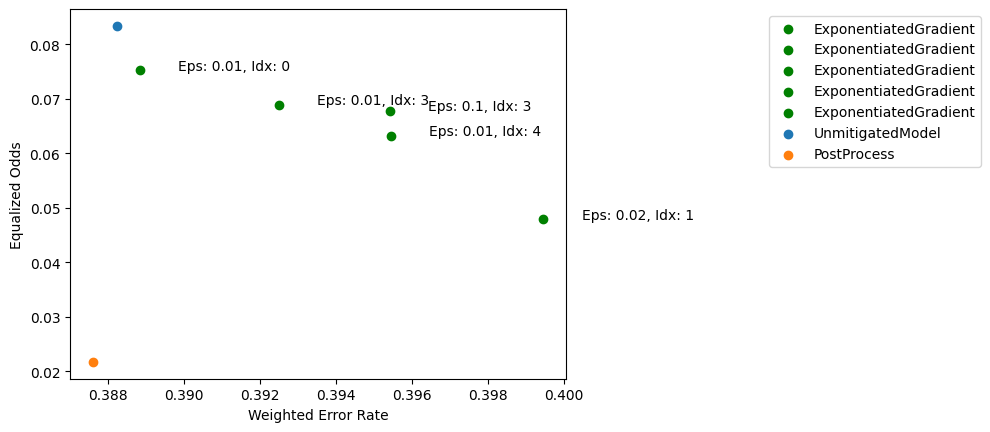

In [452]:
for index, row in performance_df_masked.iterrows():
    bal_error, eq_odds_diff = row["balanced_error"], row["equalized_odds"]
    epsilon_, index_ = row["epsilon"], row["index"]
    plt.scatter(
        bal_error, eq_odds_diff, color="green", label="ExponentiatedGradient"
    )
    plt.text(
        bal_error + 0.001,
        eq_odds_diff + 0.0001,
        f"Eps: {epsilon_}, Idx: {int(index_)}",
        fontsize=10,
    )
plt.scatter(
    1.0 - balanced_accuracy_unmitigated,
    equalized_odds_unmitigated,
    label="UnmitigatedModel",
)
plt.scatter(
    1.0 - bal_acc_postprocess, eq_odds_postprocess, label="PostProcess"
)
plt.xlabel("Weighted Error Rate")
plt.ylabel("Equalized Odds")
plt.legend(bbox_to_anchor=(1.85, 1))

In [370]:
def filter_models_by_unmitigiated_score(
    all_models,
    models_frames,
    unmitigated_score,
    performance_metric="balanced_error",
    fairness_metric="equalized_odds",
    threshold=0.01,
):
    """Filter out models whose performance score is above the desired
    threshold. Out of the remaining model, return the models with the best
    score on the fairness metric.

    Parameters
    ----------
    all_models: Dictionary (Epsilon, Index) mapping (epilson, index number) pairs to a Model object
    models_frames: A DataFrame representing each model's performance and fairness score.
    unmitigated_score: The performance score of the unmitigated model.
    performance_metric: The model performance metric to threshold on.
    fairness_metric: The fairness metric to optimize for
    threshold: The threshold padding added to the :code:`unmitigated_score`.

    """
    # Create threshold based on balanced_error of unmitigated model and filter
    models_filtered = models_frames.query(
        f"{performance_metric} <= {unmitigated_score + threshold}"
    )
    if models_filtered.empty:
        raise ValueError("No models meet the performance threshold.")

    best_row = models_filtered.sort_values(by=[fairness_metric]).iloc[0]
    # Choose the model with smallest equalized_odds difference
    epsilon, index = best_row[["epsilon", "index"]]
    return {
        "model": all_models[epsilon][index],
        "epsilon": epsilon,
        "index": index,
    }


In [453]:
print("Unmitigated Score:", 1.0 - balanced_accuracy_unmitigated)
print("Threshold:", 0.015)

Unmitigated Score: 0.3882304470082696
Threshold: 0.015


In [470]:
best_model_E= filter_models_by_unmitigiated_score(
    all_models,
    models_frames=performance_df,
    unmitigated_score=(1.0 - balanced_accuracy_unmitigated),
    threshold=0.015,
)

print(
    f"Epsilon for best model: {best_model_E.get('epsilon')}, Index number: {best_model_E.get('index')}"
)
inprocess_model = best_model_E.get("model")


Epsilon for best model: 0.02, Index number: 1.0


In [471]:
y_pred_inprocess = inprocess_model.predict(X_test)

bal_acc_inprocess = balanced_accuracy_score(y_test, y_pred_inprocess)
eq_odds_inprocess = equalized_odds_difference(
    y_test, y_pred_inprocess, sensitive_features=A_test
)

In [472]:
metricframe_inprocess = MetricFrame(
    metrics=fairness_metrics,
    y_true=y_test,
    y_pred=y_pred_inprocess,
    sensitive_features=A_test,
)

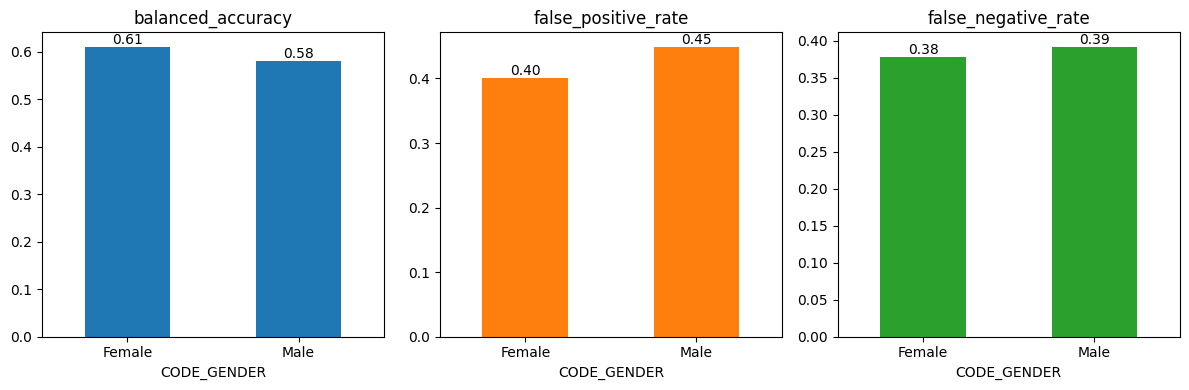

In [502]:
ax_arr2 = metricframe_inprocess.by_group[metrics_to_report].plot.bar(
    subplots=True, layout=[1, 3], figsize=[12, 4], legend=None, rot=0
)
# Iterate over each Axes object and each bar
for ax in ax_arr2.flatten():
    for bar in ax.patches:
        value = bar.get_height()
        text = f'{value:.2f}'
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), text, ha='center', va='bottom')
# to make the code_gender 0 and 1 to be shown as female and male
    ax.set_xticks(range(2))
    ax.set_xticklabels(['Female', 'Male'])
# Display the plot
plt.tight_layout()
plt.show()

#Upsample gender#

In [479]:
df_train =  pd.concat([X_train_down, A_train_down], axis=1)
df_train['target'] = y_train_down

In [480]:

from sklearn.utils import resample

def balance_classes_upsample(df_train, target, feature, random_state=123):
    # Split the dataset based on the target variable
    df_class_0 = df_train[df_train[target] == 0]
    df_class_1 = df_train[df_train[target] == 1]

    # Calculate the number of samples for the imbalanced feature within each class
    N_gender_1_class_0 = len(df_class_0[df_class_0[feature] == 1])
    N_gender_0_class_0 = len(df_class_0[df_class_0[feature] == 0])
    N_gender_1_class_1 = len(df_class_1[df_class_1[feature] == 1])
    N_gender_0_class_1 = len(df_class_1[df_class_1[feature] == 0])

    # Determine the majority class for each gender within each class
    target_count = max(N_gender_1_class_0, N_gender_0_class_0, N_gender_1_class_1, N_gender_0_class_1)

    # Resample the imbalanced feature within each class
    # For class 1, CODE_GENDER = 1
    minority_class_1 = df_class_1[df_class_1[feature] == 1]
    oversampled_minority_1 = resample(minority_class_1,
                                      replace=True,  # Sample with replacement
                                      n_samples=target_count,
                                      random_state=random_state)
    # For class 1, CODE_GENDER = 0
    majority_class_1 = df_class_1[df_class_1[feature] == 0]
    oversampled_majority_1 = resample(majority_class_1,
                                      replace=True,
                                      n_samples=target_count,
                                      random_state=random_state)
    balanced_class_1 = pd.concat([oversampled_minority_1, oversampled_majority_1])

    # For class 0, CODE_GENDER = 1
    minority_class_0 = df_class_0[df_class_0[feature] == 1]
    oversampled_minority_0 = resample(minority_class_0,
                                      replace=True,  # Sample with replacement
                                      n_samples=target_count,
                                      random_state=random_state)
    # For class 0, CODE_GENDER = 0
    majority_class_0 = df_class_0[df_class_0[feature] == 0]
    oversampled_majority_0 = resample(majority_class_0,
                                      replace=True,
                                      n_samples=target_count,
                                      random_state=random_state)
    balanced_class_0 = pd.concat([oversampled_minority_0, oversampled_majority_0])

    # Combine the balanced classes into a single DataFrame
    balanced_df = pd.concat([balanced_class_0, balanced_class_1])

    return balanced_df

# Example usage:
balanced_df = balance_classes_upsample(df_train, target='target', feature='CODE_GENDER', random_state=123)
print(balanced_df['CODE_GENDER'].value_counts())


CODE_GENDER
1    2916
0    2916
Name: count, dtype: int64


In [481]:
sensitive_features= 'CODE_GENDER'
A_train_up = balanced_df[sensitive_features]

X_train_up = balanced_df.drop(['target', 'CODE_GENDER'], axis=1)
y_train_up = balanced_df['target']


In [482]:
A_train_up.value_counts()


CODE_GENDER
1    2916
0    2916
Name: count, dtype: int64

In [483]:
A_train_down.value_counts()

CODE_GENDER
0    2823
1    1343
Name: count, dtype: int64

In [484]:
# Define the steps of the pipeline

pipeline_steps3 = [
    ('scaler', MinMaxScaler()),
    ('classifier', XGBClassifier(rand_seed=2))
]

# Create the pipeline
model_pipeline3 = Pipeline(steps=pipeline_steps)

# Define the parameter grid
param_grid3 = {
    'classifier__n_estimators': np.arange(20, 400, 20),
    'classifier__learning_rate': [0.01, 0.02, 0.05, 0.08, 0.1, 0.15, 0.2],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__max_depth': np.arange(3, 18, 1),
    'classifier__min_child_weight': np.arange(1, 8, 1),
    # 'classifier__eval_metric': ['auc']
}

X
random_search3 = RandomizedSearchCV(model_pipeline3, param_grid3, scoring='balanced_accuracy', cv=5, random_state=234).fit(X_train_up, y_train_up)

random_search3.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=16, max_leaves=None,
                               min_child_weight=4, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=120, n_jobs=None,
                               num_parallel_tree=None, rand_seed=2, ...))])

In [485]:
best_pipeline3 = random_search3.best_estimator_

In [486]:
y_test_pred3 = best_pipeline3.predict(X_test)

In [487]:
metricframe_unmitigated3 = MetricFrame(
    metrics=fairness_metrics,
    y_true=y_test,
    y_pred=y_test_pred3,
    sensitive_features=A_test,
)

# metricframe_unmitigated.by_group[metrics_to_report]

# metricframe_unmitigated.difference()[metrics_to_report]

metricframe_unmitigated3.overall[metrics_to_report]


balanced_accuracy      0.578779
false_positive_rate    0.428896
false_negative_rate    0.413545
dtype: float64

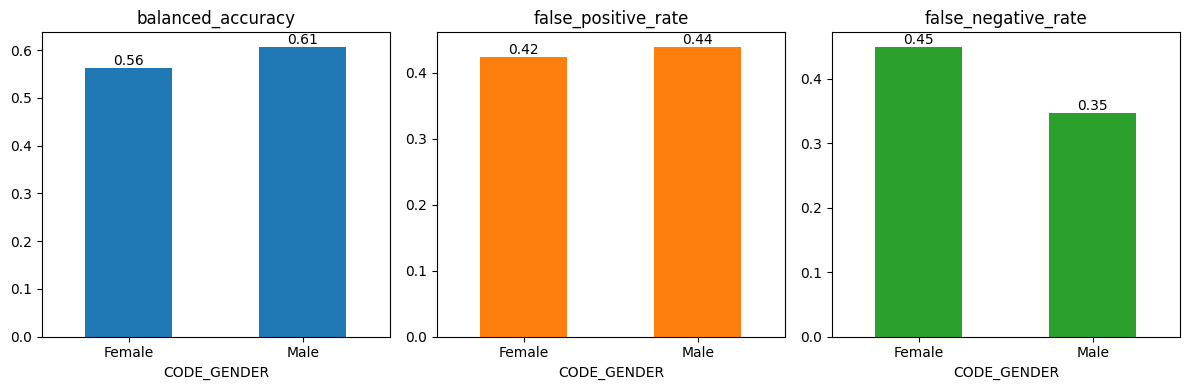

In [503]:
ax_arr3 = metricframe_unmitigated3.by_group[metrics_to_report].plot.bar(
    subplots=True, layout=[1, 3], figsize=[12, 4], legend=None, rot=0
)
# Iterate over each Axes object and each bar
for ax in ax_arr3.flatten():
    for bar in ax.patches:
        value = bar.get_height()
        text = f'{value:.2f}'
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), text, ha='center', va='bottom')
# to make the code_gender 0 and 1 to be shown as female and male
    ax.set_xticks(range(2))
    ax.set_xticklabels(['Female', 'Male'])
# Display the plot
plt.tight_layout()
plt.show()

#apply threshold optimizer on top

In [489]:
postprocess_est3 = ThresholdOptimizer(
    estimator=best_pipeline3,
    constraints="equalized_odds",
    objective="balanced_accuracy_score",
    prefit=True,
    predict_method="predict_proba",
)

In [490]:
postprocess_est3.fit(X=X_train_up, y=y_train_up, sensitive_features=A_train_up)

postprocess_pred3 = postprocess_est3.predict(X_test, sensitive_features=A_test)

postprocess_pred_proba3 = postprocess_est3._pmf_predict(
    X_test, sensitive_features=A_test
)

In [491]:
def compare_metricframe_results(mframe_1, mframe_2, metrics, names):
    """Concatenate the results of two MetricFrames along a subset of metrics.

    Parameters
    ----------
    mframe_1: First MetricFrame for comparison
    mframe_2: Second MetricFrame for comparison
    metrics: The subset of metrics for comparison
    names: The names of the selected metrics

    Returns
    -------
    MetricFrame : MetricFrame
        The concatenation of the two MetricFrames, restricted to the metrics
        specified.

    """
    return pd.concat(
        [mframe_1.by_group[metrics], mframe_2.by_group[metrics]],
        keys=names,
        axis=1,
    )

In [492]:
bal_acc_postprocess3 = balanced_accuracy_score(y_test, postprocess_pred3)
eq_odds_postprocess3 = equalized_odds_difference(
    y_test, postprocess_pred3, sensitive_features=A_test
)

metricframe_postprocess = MetricFrame(
    metrics=fairness_metrics,
    y_true=y_test,
    y_pred=postprocess_pred,
    sensitive_features=A_test,
)

metricframe_postprocess.overall[metrics_to_report]

metricframe_postprocess.difference()[metrics_to_report]

balanced_accuracy      0.000696
false_positive_rate    0.020335
false_negative_rate    0.021726
dtype: float64

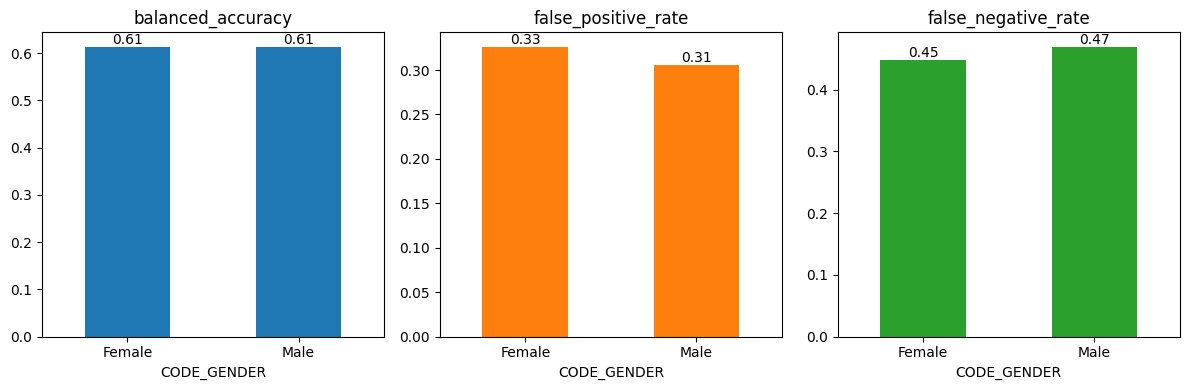

In [504]:
compare_metricframe_results(
    metricframe_unmitigated0,
    metricframe_postprocess,
    metrics=metrics_to_report,
    names=["Unmitigated", "PostProcess"],
)
ax_arr1 = metricframe_postprocess.by_group[metrics_to_report].plot.bar(
    subplots=True, layout=[1, 3], figsize=[12, 4], legend=None, rot=0
)
# Iterate over each Axes object and each bar
for ax in ax_arr1.flatten():
    for bar in ax.patches:
        value = bar.get_height()
        text = f'{value:.2f}'
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), text, ha='center', va='bottom')
# to make the code_gender 0 and 1 to be shown as female and male
    ax.set_xticks(range(2))
    ax.set_xticklabels(['Female', 'Male'])
# Display the plot
plt.tight_layout()
plt.show()

#Downsample gender#

In [494]:


def balance_classes_downsample(df_train, target, feature, random_state=123):
    # Split the dataset based on the target variable
    df_class_0 = df_train[df_train[target] == 0]
    df_class_1 = df_train[df_train[target] == 1]

    # Calculate the number of samples for the imbalanced feature within each class
    N_gender_1_class_0 = len(df_class_0[df_class_0[feature] == 1])
    N_gender_0_class_0 = len(df_class_0[df_class_0[feature] == 0])
    N_gender_1_class_1 = len(df_class_1[df_class_1[feature] == 1])
    N_gender_0_class_1 = len(df_class_1[df_class_1[feature] == 0])

    # Determine the minority class size for each gender within each class
    target_count_class_0 = min(N_gender_1_class_0, N_gender_0_class_0)
    target_count_class_1 = min(N_gender_1_class_1, N_gender_0_class_1)

    # Downsample the majority feature within each class
    # For class 1, CODE_GENDER = 0
    majority_class_1 = df_class_1[df_class_1[feature] == 0]
    downsampled_majority_1 = resample(majority_class_1,
                                      replace=False,  # Sample without replacement
                                      n_samples=target_count_class_1,
                                      random_state=random_state)
    # For class 1, CODE_GENDER = 1
    minority_class_1 = df_class_1[df_class_1[feature] == 1]
    downsampled_minority_1 = resample(minority_class_1,
                                      replace=False,
                                      n_samples=target_count_class_1,
                                      random_state=random_state)
    balanced_class_1 = pd.concat([downsampled_minority_1, downsampled_majority_1])

    # For class 0, CODE_GENDER = 0
    majority_class_0 = df_class_0[df_class_0[feature] == 0]
    downsampled_majority_0 = resample(majority_class_0,
                                      replace=False,  # Sample without replacement
                                      n_samples=target_count_class_0,
                                      random_state=random_state)
    # For class 0, CODE_GENDER = 1
    minority_class_0 = df_class_0[df_class_0[feature] == 1]
    downsampled_minority_0 = resample(minority_class_0,
                                      replace=False,
                                      n_samples=target_count_class_0,
                                      random_state=random_state)
    balanced_class_0 = pd.concat([downsampled_minority_0, downsampled_majority_0])

    # Combine the balanced classes into a single DataFrame
    balanced_df = pd.concat([balanced_class_0, balanced_class_1])

    return balanced_df

# Example usage:
balanced_df2 = balance_classes_downsample(df_train, target='target', feature='CODE_GENDER', random_state=123)
print(balanced_df2['CODE_GENDER'].value_counts())


CODE_GENDER
1    1343
0    1343
Name: count, dtype: int64


In [495]:
sensitive_features= 'CODE_GENDER'
A_train_down2 = balanced_df2[sensitive_features]

X_train_down2 = balanced_df2.drop(['target', 'CODE_GENDER'], axis=1)
y_train_down2 = balanced_df2['target']


In [496]:
A_train_down2.value_counts()


CODE_GENDER
1    1343
0    1343
Name: count, dtype: int64

In [497]:
# Define the steps of the pipeline

pipeline_steps4 = [
    ('scaler', MinMaxScaler()),
    ('classifier', XGBClassifier(rand_seed=2))
]

# Create the pipeline
model_pipeline4 = Pipeline(steps=pipeline_steps)

# Define the parameter grid
param_grid4 = {
    'classifier__n_estimators': np.arange(20, 400, 20),
    'classifier__learning_rate': [0.01, 0.02, 0.05, 0.08, 0.1, 0.15, 0.2],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__max_depth': np.arange(3, 18, 1),
    'classifier__min_child_weight': np.arange(1, 8, 1),
    # 'classifier__eval_metric': ['auc']
}

X
random_search4 = RandomizedSearchCV(model_pipeline4, param_grid4, scoring='balanced_accuracy', cv=5, random_state=23).fit(X_train_down2, y_train_down2)

random_search4.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.08,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None, min_child_weight=2,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=360,
                               n_jobs=None, num_parallel_tree=None, rand_seed=2, ...))])

In [498]:
best_pipeline4 = random_search4.best_estimator_

In [499]:
y_test_pred4 = best_pipeline4.predict(X_test)

In [500]:
metricframe_unmitigated4 = MetricFrame(
    metrics=fairness_metrics,
    y_true=y_test,
    y_pred=y_test_pred4,
    sensitive_features=A_test,
)

# metricframe_unmitigated.by_group[metrics_to_report]

# metricframe_unmitigated.difference()[metrics_to_report]

metricframe_unmitigated4.overall[metrics_to_report]


balanced_accuracy      0.601908
false_positive_rate    0.483504
false_negative_rate    0.312680
dtype: float64

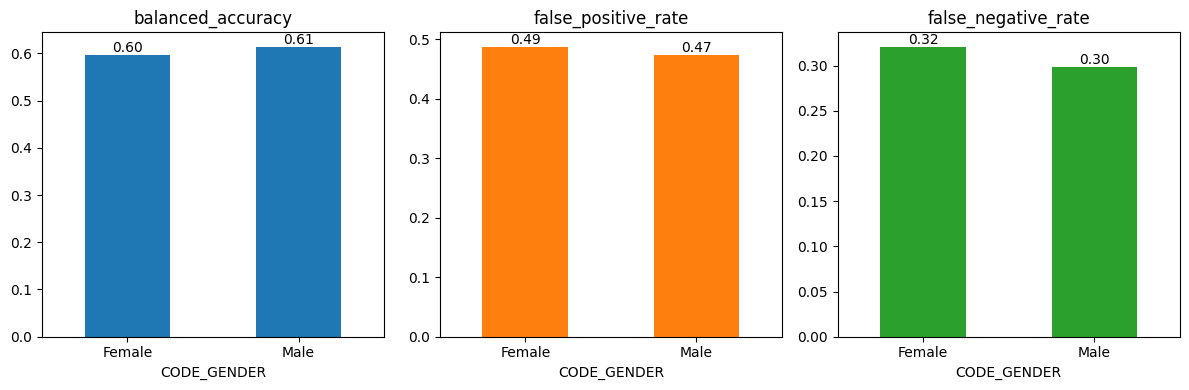

In [505]:
ax_arr4 = metricframe_unmitigated4.by_group[metrics_to_report].plot.bar(
    subplots=True, layout=[1, 3], figsize=[12, 4], legend=None, rot=0
)
# Iterate over each Axes object and each bar
for ax in ax_arr4.flatten():
    for bar in ax.patches:
        value = bar.get_height()
        text = f'{value:.2f}'
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), text, ha='center', va='bottom')
# to make the code_gender 0 and 1 to be shown as female and male
    ax.set_xticks(range(2))
    ax.set_xticklabels(['Female', 'Male'])
# Display the plot
plt.tight_layout()
plt.show()

#Combine preprocesssing and postprocessing methods#

In [ ]:
def resample_training_data(X_train, Y_train, A_train):
    """Down-sample the majority class in the training dataset to produce a
    balanced dataset with a 50/50 split in the predictive labels.

    Parameters:
    X_train: The training split of the features
    Y_train: The training split of the target labels
    A_train: The training split of the sensitive features

    Returns:
    Tuple of X_train, Y_train, A_train where each dataset has been re-balanced.
    """
    negative_ids = Y_train[Y_train == 0].index
    positive_ids = Y_train[Y_train == 1].index
    balanced_ids = positive_ids.union(
        np.random.choice(a=negative_ids, size=len(positive_ids))
    )

    X_train = X_train.loc[balanced_ids, :]
    Y_train = Y_train.loc[balanced_ids]
    A_train = A_train.loc[balanced_ids]
    return X_train, Y_train, A_train

In [ ]:

X_train_d, y_train_d, A_train_d = resample_training_data(X_train, y_train, A_train)

In [ ]:
y_train_d.value_counts()

target
1    15710
0    15710
Name: count, dtype: int64

In [ ]:
A_train_d.value_counts()

CODE_GENDER
0    21661
1     9759
Name: count, dtype: int64

In [ ]:
# Define the steps of the pipeline

pipeline_steps3 = [
    ('scaler', MinMaxScaler()),
    ('classifier', XGBClassifier())
]

# Create the pipeline
model_pipeline3 = Pipeline(steps=pipeline_steps)

# Define the parameter grid
param_grid = {
    'classifier__n_estimators': np.arange(500, 801, 100),
    'classifier__learning_rate': [0.05, 0.08, 0.1, 0.15],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__max_depth': np.arange(7, 12, 1),
    # 'classifier__colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'classifier__min_child_weight': np.arange(1, 6, 1),
    'classifier__eval_metric': ['auc']
}


random_search3 = RandomizedSearchCV(model_pipeline3, param_grid, scoring='balanced_accuracy', cv=5).fit(X_train_d, y_train_d)

random_search3.best_estimator_


Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='auc',
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.08,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=600,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [ ]:
best_pipeline3 = random_search3.best_estimator_

In [ ]:
y_test_pred3 = best_pipeline3.predict(X_test)

In [ ]:
metricframe_unmitigated3 = MetricFrame(
    metrics=fairness_metrics,
    y_true=y_test,
    y_pred=y_test_pred3,
    sensitive_features=A_test,
)

# metricframe_unmitigated.by_group[metrics_to_report]

# metricframe_unmitigated.difference()[metrics_to_report]

metricframe_unmitigated3.overall[metrics_to_report]

balanced_accuracy      0.645923
false_positive_rate    0.580027
false_negative_rate    0.128127
dtype: float64

array([[<Axes: title={'center': 'balanced_accuracy'}, xlabel='CODE_GENDER'>,
        <Axes: title={'center': 'false_positive_rate'}, xlabel='CODE_GENDER'>,
        <Axes: title={'center': 'false_negative_rate'}, xlabel='CODE_GENDER'>]],
      dtype=object)

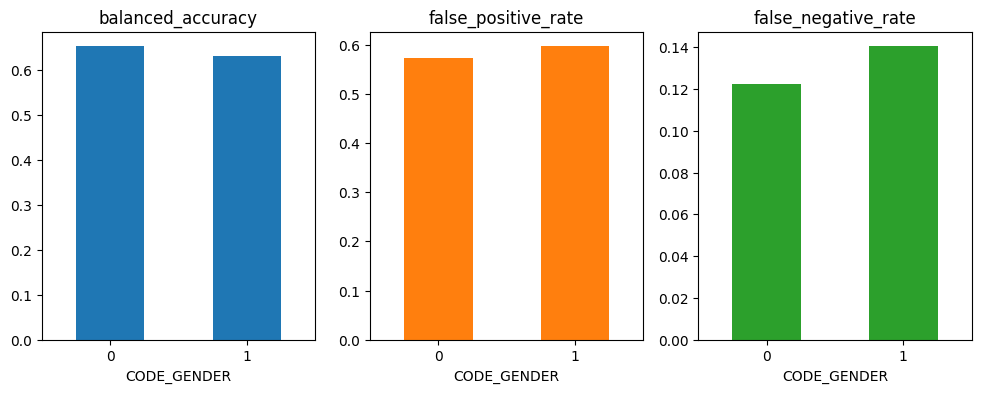

In [ ]:
metricframe_unmitigated3.by_group[metrics_to_report].plot.bar(
    subplots=True, layout=[1, 3], figsize=[12, 4], legend=None, rot=0
)